In [2]:
#export 
source("exp/nb_01.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘survival’ was built under R version 4.1.1”
Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [3]:
dfs = readRDS(paste(data_path,"dfs_filtered.rds", sep=""))
names(dfs)

[1] "METABRIC" "GSE11121" "GSE96058" "GSE7390"  "GSE9893"  "NKI"      "TCGA"    
[8] "GSE4922"

### Helper functions

In [5]:
#export
sample_ints = function(start, end, signature_size){sample(start:end, signature_size, replace=F)}

In [6]:
#export
sample_signature = function(df, size = 20){
    if(!is.data.frame(df)) stop("df must be data frame!")
    i = first_expr_col(df)
    e = dim(df)[2]
    indxs = sample_ints(i, e, size)
    genes = names(df)[indxs]
    list(indxs = indxs, genes = genes, cols4cox = c("survival_time", "event", genes))
}

In [7]:
#export
sample_list_of_signatures = function(df, n = 100){
    l = vector("list", n)
    for (i in 1:n){
        signature = sample_signature(df)
        l[[i]] = df[, signature$cols4cox]
    }
    l
}

## Select random signatures

In [4]:
dfs_random = map(dfs, sample_list_of_signatures)
names(dfs_random) = names(dfs)

In [424]:
map(dfs_random, function(x) c(length(x), dim(x[[1]])))

$METABRIC
[1] 100 683  22

$GSE11121
[1] 100 120  22

$GSE96058
[1]  100 1102   22

$GSE7390
[1] 100 134  22

$GSE9893
[1] 100  86  22

$NKI
[1] 100 179  22

$TCGA
[1] 100 169  22

$GSE4922
[1] 100  80  22

## Select NKI separately

In [15]:
complete_df = function(df){df[complete.cases(df), ]}

In [29]:
sample_signature_rec = function(df){
    signature = sample_signature(df)
    if(dim(complete_df(df[, signature$cols4cox]))[1]<170){ #at least 170 patients without NANs
        sample_signature_rec(df)
    }
    else(return(signature))
}

In [30]:
sample_list_of_signatures = function(df, n = 100){
    l = vector("list", n)
    for (i in 1:n){
        signature = sample_signature_rec(df)
        l[[i]] = df[, signature$cols4cox]
    }
    l
}

In [31]:
dfs_nki = sample_list_of_signatures(dfs[[6]])

In [32]:
length(dfs_nki)

[1] 100

In [33]:
dfs_nki = map(dfs_nki, complete_df)

In [34]:
map(dfs_nki, dim)

[[1]]
[1] 172  22

[[2]]
[1] 170  22

[[3]]
[1] 170  22

[[4]]
[1] 174  22

[[5]]
[1] 171  22

[[6]]
[1] 171  22

[[7]]
[1] 174  22

[[8]]
[1] 174  22

[[9]]
[1] 171  22

[[10]]
[1] 170  22

[[11]]
[1] 170  22

[[12]]
[1] 170  22

[[13]]
[1] 170  22

[[14]]
[1] 170  22

[[15]]
[1] 170  22

[[16]]
[1] 170  22

[[17]]
[1] 171  22

[[18]]
[1] 170  22

[[19]]
[1] 170  22

[[20]]
[1] 174  22

[[21]]
[1] 174  22

[[22]]
[1] 170  22

[[23]]
[1] 175  22

[[24]]
[1] 173  22

[[25]]
[1] 174  22

[[26]]
[1] 171  22

[[27]]
[1] 171  22

[[28]]
[1] 170  22

[[29]]
[1] 172  22

[[30]]
[1] 174  22

[[31]]
[1] 170  22

[[32]]
[1] 170  22

[[33]]
[1] 172  22

[[34]]
[1] 172  22

[[35]]
[1] 170  22

[[36]]
[1] 170  22

[[37]]
[1] 173  22

[[38]]
[1] 171  22

[[39]]
[1] 175  22

[[40]]
[1] 174  22

[[41]]
[1] 170  22

[[42]]
[1] 170  22

[[43]]
[1] 174  22

[[44]]
[1] 173  22

[[45]]
[1] 170  22

[[46]]
[1] 170  22

[[47]]
[1] 171  22

[[48]]
[1] 170  22

[[49]]
[1] 171  22

[[50]]
[1] 171  22

[[51]]
[1] 174  22

[[52]]
[1] 170  22

[[53]]
[1] 175  22

[[54]]
[1] 171  22

[[55]]
[1] 174  22

[[56]]
[1] 174  22

[[57]]
[1] 174  22

[[58]]
[1] 170  22

[[59]]
[1] 171  22

[[60]]
[1] 172  22

[[61]]
[1] 174  22

[[62]]
[1] 171  22

[[63]]
[1] 171  22

[[64]]
[1] 170  22

[[65]]
[1] 170  22

[[66]]
[1] 175  22

[[67]]
[1] 170  22

[[68]]
[1] 171  22

[[69]]
[1] 171  22

[[70]]
[1] 170  22

[[71]]
[1] 172  22

[[72]]
[1] 171  22

[[73]]
[1] 171  22

[[74]]
[1] 172  22

[[75]]
[1] 173  22

[[76]]
[1] 173  22

[[77]]
[1] 174  22

[[78]]
[1] 170  22

[[79]]
[1] 170  22

[[80]]
[1] 174  22

[[81]]
[1] 173  22

[[82]]
[1] 170  22

[[83]]
[1] 170  22

[[84]]
[1] 170  22

[[85]]
[1] 170  22

[[86]]
[1] 170  22

[[87]]
[1] 171  22

[[88]]
[1] 171  22

[[89]]
[1] 174  22

[[90]]
[1] 171  22

[[91]]
[1] 173  22

[[92]]
[1] 174  22

[[93]]
[1] 170  22

[[94]]
[1] 170  22

[[95]]
[1] 171  22

[[96]]
[1] 172  22

[[97]]
[1] 170  22

[[98]]
[1] 170  22

[[99]]
[1] 174  22

[[100]]
[1] 171  22

In [36]:
dfs = readRDS(paste(data_path,"dfs_random.rds", sep=""))

In [37]:
dfs[[6]] = dfs_nki

In [38]:
dfs_random = dfs

## Save data

In [2]:
data_path

[1] "../data/"

In [40]:
saveRDS(dfs_random, paste(data_path,"dfs_random.rds"))

## Export code

In [434]:
system("python3 notebook2script.py 02_select_random_signatures.ipynb")

## Tmp

In [8]:
data_path

[1] "../data/"

In [5]:
dfs = readRDS(paste0(data_path,"dfs_random.rds"))

In [6]:
dfs = dfs[[1]]
#signature = sample_signature(df)

In [7]:
length(dfs)

[1] 100

In [311]:
df = dfs[[1]]
dim(df)

[1] 683  22

In [312]:
head(df)

,survival_time,event,SPTLC3,USP31,TPP2,PTPN21,NRG4,KREMEN1,EHHADH,STARD3,⋯,ZNF616,NR1H4,PNCK,SAE1,GPR143,PPIL2,CCND3,LSM6,TXK,KRT36
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
274,10.000000,0,6.089496,5.234163,6.189597,5.963736,5.414187,5.536261,6.054212,6.003877,⋯,6.734788,5.345851,8.680155,10.79457,5.922245,5.519560,9.923389,5.635797,5.327464,5.492531
374,8.436111,0,5.951140,5.469094,5.984611,5.640569,5.298166,5.769836,6.097876,6.741525,⋯,6.927464,5.507525,6.850872,10.74882,6.050563,5.470432,9.812064,5.663150,5.183838,5.515980
486,8.547222,0,5.790938,5.440186,5.750838,5.596468,5.098672,5.676291,5.646151,6.055209,⋯,7.361611,5.629579,5.580626,10.73567,5.869575,5.582862,9.792015,5.450638,5.485440,5.509700
455,9.550000,0,6.216435,5.342471,5.802076,5.606559,5.240493,5.685762,5.720401,6.094324,⋯,6.433463,5.534707,6.700880,10.63298,5.512678,5.535430,10.090635,5.597046,5.308881,5.565271
166,7.177778,0,6.052456,5.336267,6.060324,5.460499,5.298983,5.673260,5.738100,6.767951,⋯,6.722901,5.196454,5.920830,10.96572,5.996254,5.663366,9.963352,5.402581,5.087325,5.360705
121,10.000000,0,6.524135,5.409722,5.755829,5.543200,5.245360,5.701686,5.690964,6.327546,⋯,6.645326,5.429544,6.070628,10.65084,5.821284,5.385666,10.356718,5.562533,5.316211,5.150078


In [57]:
names(df)

[1] "survival_time" "event"         "SPTLC3"        "USP31"        
 [5] "TPP2"          "PTPN21"        "NRG4"          "KREMEN1"      
 [9] "EHHADH"        "STARD3"        "ARID3B"        "ZNF790"       
[13] "ZNF616"        "NR1H4"         "PNCK"          "SAE1"         
[17] "GPR143"        "PPIL2"         "CCND3"         "LSM6"         
[21] "TXK"           "KRT36"

In [58]:
#fs = reformulate(names(df)[3:22], fS)

In [59]:
fS = Surv(survival_time, event) ~ .

In [60]:
m = coxph(fS, data =  df, x=T, y=T)

In [61]:
summary(m)

Call:
coxph(formula = fS, data = df, x = T, y = T)

  n= 683, number of events= 164 

            coef exp(coef) se(coef)      z Pr(>|z|)  
SPTLC3   0.09711   1.10198  0.25067  0.387   0.6985  
USP31    0.69435   2.00240  0.56165  1.236   0.2164  
TPP2     0.47878   1.61411  0.41018  1.167   0.2431  
PTPN21  -0.56427   0.56878  0.34653 -1.628   0.1035  
NRG4     0.55399   1.74018  0.56235  0.985   0.3246  
KREMEN1 -0.22302   0.80010  0.96654 -0.231   0.8175  
EHHADH  -0.82898   0.43650  0.32928 -2.518   0.0118 *
STARD3   0.25180   1.28634  0.11416  2.206   0.0274 *
ARID3B  -0.34321   0.70949  0.29822 -1.151   0.2498  
ZNF790  -0.64949   0.52231  0.56502 -1.149   0.2504  
ZNF616   0.16507   1.17948  0.24657  0.669   0.5032  
NR1H4   -0.30474   0.73731  0.56826 -0.536   0.5918  
PNCK     0.09656   1.10137  0.07747  1.246   0.2126  
SAE1     0.48655   1.62670  0.24742  1.966   0.0492 *
GPR143  -0.19816   0.82024  0.33460 -0.592   0.5537  
PPIL2    1.17553   3.23985  0.75730  1.552   0.120

In [62]:
table(df$event)


  0   1 
519 164 

## Tmp

In [82]:
cindex = function(df){
    m = coxph(Surv(survival_time, event) ~ ., data =  df, x=T, y=T)
    summary(m)$concordance[[1]]}

In [218]:
scale = function(x, newMin = 0, newMax = 16){(x - min(x))/(max(x)-min(x)) * (newMax - newMin) + newMin }

In [219]:
X = df[,1:2]
dim(X)

[1] 683   2

In [220]:
X["Golden_Gene"] = scale(X$survival_time)

In [221]:
head(X)

,survival_time,event,Golden_Gene
,<dbl>,<dbl>,<dbl>
274,10.000000,0,16.00000
374,8.436111,0,13.46753
486,8.547222,0,13.64746
455,9.550000,0,15.27130
166,7.177778,0,11.42986
121,10.000000,0,16.00000


In [222]:
cindex(X)

[1] 0.9999781

In [305]:
noisy_df = function(df, percent){
    N = nrow(df)
    M = as.integer(percent * (N)/100)
    rand_inds = sample(1:N, M)
    df[rand_inds,3] =  rexp(M)
    df
}

In [306]:
CI = vector("list", 100)
for (i in 1:100){
    ndf = noisy_df(X, i)
    ci = cindex(ndf)
    CI[[i]] = ci
}

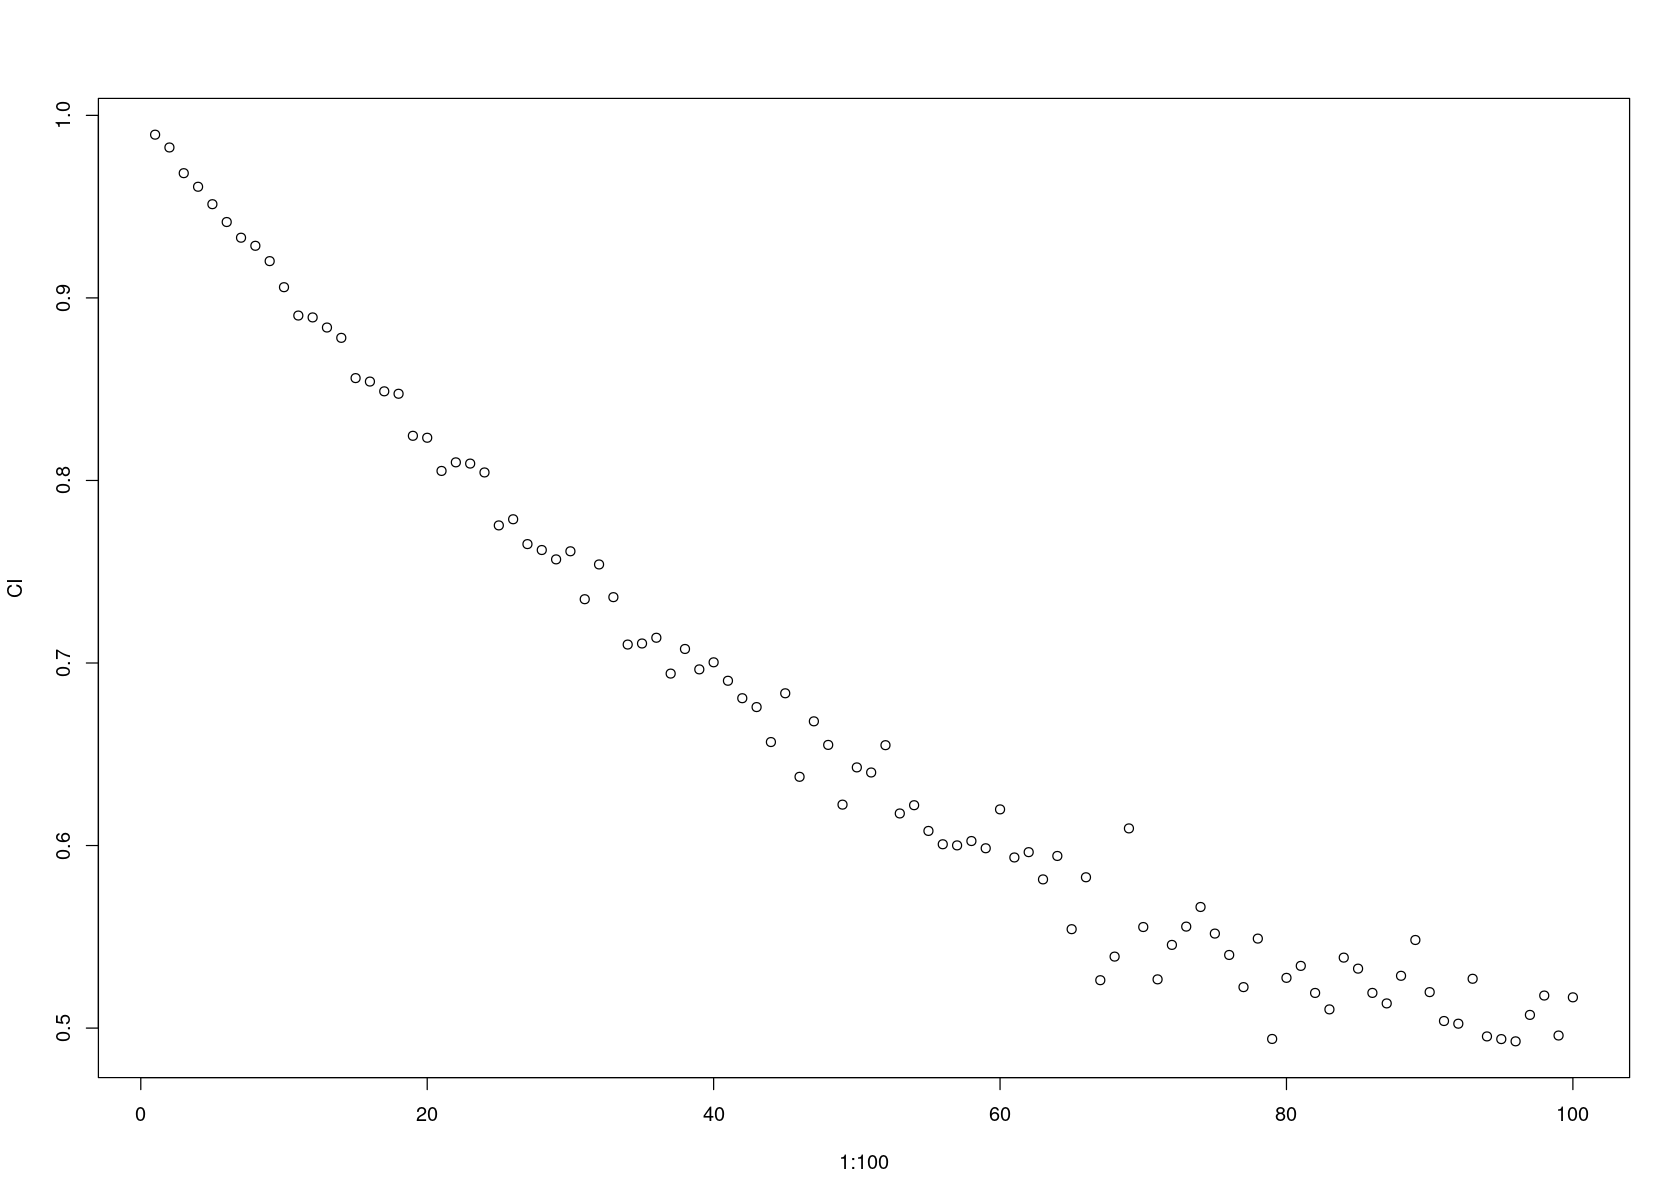

In [307]:
plot(1:100, CI)